#**PROJECT NAME** : **Sentiment Analysis of Movie Reviews**

* In this project, the goal is to examine the reviews of the movie to see the overall sentiment the audience has for the movie. Then, will train different Machine learning models to predict if the review is positive or negative based on the text data provided in the dataset.

## Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import re
import nltk
import spacy
sns.set_style('darkgrid')

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

##Loading Dataset

In [23]:
dataframe = pd.read_csv('/content/drive/MyDrive/CodeClause/Project 1/movie_reviews.csv.zip')

## Understanding the Data / Data Inspection / Data Exploration

In [24]:
dataframe.shape

(50000, 2)

* This dataset is quite big let's analyze only first 10000 movie reviews.

In [68]:
# Let's take only first 10000 movie reviews
df = dataframe.iloc[:10000]                  # df = dataframe.head(10000)

In [69]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [70]:
print(f'No. of Columns: {df.shape[1]}')
print(f'No. of Rows: {df.shape[0]}')
df.shape

No. of Columns: 2
No. of Rows: 10000


(10000, 2)

In [71]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [73]:
# Descriptive Analysis
df.describe()

,review,sentiment
count,10000,10000
unique,9983,2
top,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
freq,2,5028


## Data Cleaning

In [74]:
# Checking Null Values
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [75]:
# Checking Duplicates
df.duplicated().sum()

17

In [76]:
# Checking & Identifying Duplicates
df[df.duplicated()]         # df[df.duplicated() == True]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
6672,Sigh. I'm baffled when I see a short like this...,negative
7221,"I have always been a huge fan of ""Homicide: Li...",positive
7222,There are plenty of comments already posted sa...,negative
7425,"The movie was excellent, save for some of the ...",positive
7555,This movie has made me upset! When I think of ...,negative


In [77]:
# Remove Duplicated Values
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

## Data Formating

In [78]:
# There is no need to change any column's data type.
# There is no need to drop any columns.
# There is no need to rename any columns.

## **Predictive Analysis**

Let's start building different Machine Learning models and train them.

positive    0.503155
negative    0.496845
Name: sentiment, dtype: float64


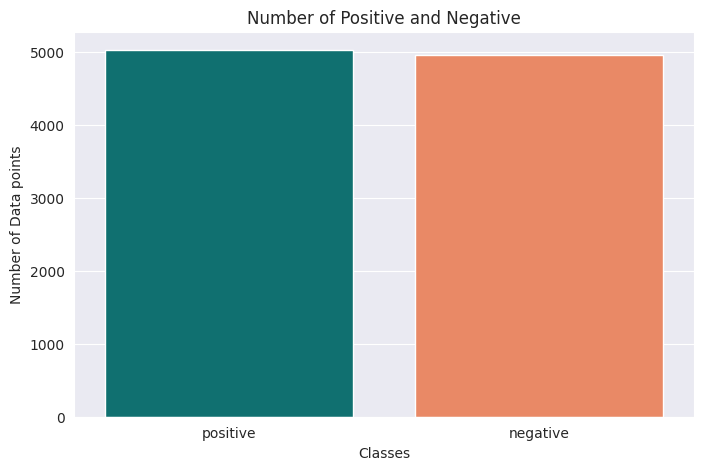

In [80]:
# Plotting and Checking if the data is imbalanced or not
data_bal = df['sentiment'].value_counts(normalize= True)
print(data_bal)

plt.figure(figsize=(8,5))
fig = sns.countplot(df, x= 'sentiment', palette= ['teal', 'coral'])
fig.set_title('Number of Positive and Negative')
fig.set_xlabel('Classes')
fig.set_ylabel('Number of Data points')
plt.show()

### Data Preprocessing / Text Preprocessing

1. Text Cleaning:
* Remove unnecessary characters(emojis, url, html tags, punctuation, numbers, chat words)
* tokenization
* stopwords
* apply stemming or lemmatization.
2. Vectorization: Convert text data into numerical format using techniques like TF-IDF or CountVectorizer, which are essential for machine learning models to process text data.


Text Cleaning

In [81]:
# Lowercasing                                # df['review'] = df['review'].astype(str)
df['review'] = df['review'].str.lower()      # df['review'] = df['review'].lower()  inside function
df['review'].head()
                                             # df['review'] = df['review'].apply(lambda x: x.lower())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [83]:
# Removing HTML tags
def remove_html_tags(text):                          # def remove_html_tags(text):
  text = re.sub('<.*?>', ' ', text)                  #   pattern = re.compile('<.*?>')
  return text                                        #   return pattern.sub(r'', text)

df['review'] = df['review'].apply(remove_html_tags)  # df['review'] = df['review'].astype(str)
df['review'].head()                                  # df['review'] = re.sub('<.*?>', ' ',df['review'])

                                                     # lambda
                                                     # def strip_html_tags(text):
                                                     #   soup = BeautifulSoup(text, "html.parser")
                                                     #   return soup.get_text()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production.   the filming t...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [84]:
# Removing URL                                        # lambda
def remove_url(text):                                       # def remove_url(text):
  text = re.sub('https?://\S+|www.\.\S+', ' ', text)        #  pattern = re.compile(r'https?://\S+|www.\.\S+')
  return text                                               #  return pattern.sub(r'', text)

df['review'] = df['review'].apply(remove_url)               # df['review'] = df['review'].astype(str)
df['review'].head()                                         # df['review'] = re.sub('https?://\S+|www.\.\S+', ' ', df['review'])

0    one of the other reviewers has mentioned that ...
1    a wonderful little production.   the filming t...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [86]:
# Removing Punctuation                               # lambda
punctuation_list = string.punctuation                   # df['review'] = df['review'].astype(str)
print(punctuation_list, '\n')                           # df['review'] = re.sub('[^a-zA-Z]', ' ', df['review'])

def remove_punctuation(text):                           # def remove_punctuation(text):
  for char in punctuation_list:                         #   text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.replace(char, ' ')                       #   return text
  return text
                                                        # def remove_punctuation(test):
df['review'] = df['review'].apply(remove_punctuation)   #   pattern = re.compile('[^a-zA-Z]')
df['review'].head()                                     #   return pattern.sub(r'', text)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 



0    one of the other reviewers has mentioned that ...
1    a wonderful little production    the filming t...
2    i thought this was a wonderful way to spend ti...
3    basically there s a family where a little boy ...
4    petter mattei s  love in the time of money  is...
Name: review, dtype: object

In [41]:
# Spell Checker                      # TextBlob, enchanter, spellchecker, pyspellchecker
def spell_checker(text):                           # df['review'] = df['review'].astype(str)
  text_blb = TextBlob(text)                        # text_blb = TextBlob(df['review'])
  text = text_blb.correct().string                 # text_blb.correct().string
  return text

df['review'] = df['review'].apply(spell_checker)
df['review'].head()

0    one of the other reviews has mentioned that af...
1    a wonderful little production    the filling t...
2    i thought this was a wonderful way to spend ti...
3    basically there s a family where a little boy ...
4    letter matter s  love in the time of money  is...
Name: review, dtype: object

In [88]:
# Remove emojis
def remove_emojis(text):
  pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                   u"\U0001F700-\U0001F77F"  # alchemical symbols
                   u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                   u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                   u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                   u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                   u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                   u"\U00002702-\U000027B0"  # Dingbats
                   u"\U000024C2-\U0001F251"
                    "]+", flags= re.UNICODE)
  return pattern.sub(r'', text)

df['review'] = df['review'].apply(remove_emojis)
df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production    the filming t...
2    i thought this was a wonderful way to spend ti...
3    basically there s a family where a little boy ...
4    petter mattei s  love in the time of money  is...
Name: review, dtype: object

In [89]:
# Removing Stopwords
nltk.download('stopwords')                                                      # lambda
stop_words = set(stopwords.words('english'))
                                                                                # def remove_stopwords(text):
def remove_stopwords(text):                                                     #   for word in text.split():
  text = ' '.join([word for word in text.split() if word not in stop_words])    #     if word in stop_words:
  return text                                                                   #       text = text.replace(word, '')
                                                                                #   return ' '.join(text)
df['review'] = df['review'].apply(remove_stopwords)
df['review'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: review, dtype: object

In [90]:
# Tokenization                                     # lambda
nlp = spacy.load('en_core_web_sm')                       # df['review'] = df['review'].astype(str)
                                                         # nlp = spacy.load('en_core_web_sm')
def apply_tokenize(text):                                # df['review'] = nlp(df['review'])
  text = nlp(text)
  return text                                            # for i in len(df):
                                                         #    df['review'][i] = nlp(df['review'][i])
df['review'] = df['review'].apply(apply_tokenize)
df['review'].head()                                      # text = word_tokenize(text) & text = sent_tokenize(text)

0    (one, reviewers, mentioned, watching, 1, oz, e...
1    (wonderful, little, production, filming, techn...
2    (thought, wonderful, way, spend, time, hot, su...
3    (basically, family, little, boy, jake, thinks,...
4    (petter, mattei, love, time, money, visually, ...
Name: review, dtype: object

In [91]:
# Stemming & Lemmatization
nlp = spacy.load('en_core_web_sm')
lemmatizer = WordNetLemmatizer()

def text_lemmatization(text):
  doc = nlp(text)
  text = ' '.join([word.lemma_ for word in doc])
  return text

df['review'] = df['review'].apply(text_lemmatization)
df['review'].head()

0    one reviewer mention watch 1 oz episode hook r...
1    wonderful little production filming technique ...
2    think wonderful way spend time hot summer week...
3    basically family little boy jake think zombie ...
4    petter mattei love time money visually stunnin...
Name: review, dtype: object

The text data has been successfully cleaned:

* Removing html tags, url, emojis, punctuation and numbers, leaving only letters.
* Converting all text to lowercase to ensure uniformity.
* Removing common English stopwords (e.g., "the", "is", "in") that do not contribute much to the meaning of the messages.
* Applying stemming / lemmaatization to reduce words to their base or root form, which helps in generalizing different forms of the same word.

Vectorization

In [92]:
# Vectorizing the cleaned text data using TF-IDF / CountVectorizer
vectorizer = CountVectorizer(max_features= 5000)
vectorized_text = vectorizer.fit_transform(df['review']).toarray()

In [93]:
vectorized_text

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [94]:
vectorized_text.shape

(9983, 5000)

* This indicates that our dataset has been vectorized into a space with 5000 features, which corresponds to the unique words identified by the CountVectorizer after preprocessing the text data.

Feature Engineering

In [95]:
# Encoding                              # lambda and if else  # df['review'] = df['review'].apply(lambda x: x.map({'positive' : 1, 'negative' : 0}))
encoder = LabelEncoder()                                      # df['review'] = df['review'].replace('positive', 1)
df['sentiment'] = encoder.fit_transform(df['sentiment'])      # df['review'] = df['review'].replace('negative', 0)
dict_senti = dict(enumerate(encoder.classes_))
print(dict_senti)                                             # df['sentiment'] = df['sentiment'].map({'positive' : 1, 'negative' : 0})

{0: 'negative', 1: 'positive'}


In [96]:
# Select and define features(x) and target variable(y)
x = vectorized_text                                     # x = vectorizer.fit_transform(df['review']).toarray()
y = df['sentiment']                                     # y = df['sentiment'].map({'positive' : 1, 'negative' : -1})

In [97]:
x[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [98]:
y[:5]

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

Data Spliting

In [99]:
# Splitting the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [100]:
# Display the shape of the training and testing sets
print('Training set shape of x: ', x_train.shape)
print('Testing set shape of x: ', x_test.shape)
print('Training set shape of y: ', y_train.shape)
print('Testing set shape of y: ', y_test.shape)

Training set shape of x:  (7986, 5000)
Testing set shape of x:  (1997, 5000)
Training set shape of y:  (7986,)
Testing set shape of y:  (1997,)


### Model Building

In [101]:
# Logistic Regression
log_reg = LogisticRegression(random_state= 42)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
print(log_reg.score(x_train, y_train))

# Naive_Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
print(nb_model.score(x_train, y_train))

# Neural Network
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train)
y_pred_nn = nn_model.predict(x_test)
print(nn_model.score(x_train, y_train))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
print(dt_model.score(x_train, y_train))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print(rf_model.score(x_train, y_train))

# K-Neighbors
kn_model = KNeighborsClassifier()
kn_model.fit(x_train, y_train)
y_pred_kn = kn_model.predict(x_test)
print(kn_model.score(x_train, y_train))

# SVM
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
print(svm_model.score(x_train, y_train))


0.9963686451289757
0.8754069621838216
1.0
1.0
1.0
0.7553218131730528
0.958427247683446


In [102]:
# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_test)
print(lgbm_model.score(x_train, y_train))

# XGboost
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print(xgb_model.score(x_train, y_train))

# Catboost
cat_model = CatBoostClassifier(verbose= False)
cat_model.fit(x_train, y_train)
y_pred_cat = cat_model.predict(x_test)
print(cat_model.score(x_train, y_train))


[LightGBM] [Info] Number of positive: 4011, number of negative: 3975
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.351930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16985
[LightGBM] [Info] Number of data points in the train set: 7986, number of used features: 4462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502254 -> initscore=0.009016
[LightGBM] [Info] Start training from score 0.009016
0.9516654144753318
0.9706987227648385
0.9297520661157025


### Model Evaluation

Logistic Regression

In [103]:
# Logistic Regression
print('The performance evaluation of Logistic Regression Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_log), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_log), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_log), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_log), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_log), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_log, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of Logistic Regression Model is below:  

Accuracy Score:  0.8542814221331998 

Precision Score:  0.8503401360544217 

F1 Score:  0.8574228319451249 

Recall Score:  0.8646245059288538 

Confusion Matrix:  
 [[831 154]
 [137 875]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.86      0.84      0.85       985
    Negative       0.85      0.86      0.86      1012

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997
 



Naive_Bayes

In [104]:
# Naive_Bayes
print('The performance evaluation of Naive_Bayes Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_nb), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_nb), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_nb), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_nb), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_nb), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_nb, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of Naive_Bayes Model is below:  

Accuracy Score:  0.8532799198798198 

Precision Score:  0.8555885262116716 

F1 Score:  0.8551655956500246 

Recall Score:  0.8547430830039525 

Confusion Matrix:  
 [[839 146]
 [147 865]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.85      0.85      0.85       985
    Negative       0.86      0.85      0.86      1012

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997
 



Neural Network

In [105]:
# Neural Network
print('The performance evaluation of Logistic Regression Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_nn), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_nn), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_nn), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_nn), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_nn), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_nn, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of Logistic Regression Model is below:  

Accuracy Score:  0.8552829243865798 

Precision Score:  0.8540646425073457 

F1 Score:  0.8578455484505657 

Recall Score:  0.8616600790513834 

Confusion Matrix:  
 [[836 149]
 [140 872]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.86      0.85      0.85       985
    Negative       0.85      0.86      0.86      1012

    accuracy                           0.86      1997
   macro avg       0.86      0.86      0.86      1997
weighted avg       0.86      0.86      0.86      1997
 



Decision Tree Model

In [106]:
# Decision Tree
print('The performance evaluation of Decision Tree Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_dt), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_dt), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_dt), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_dt), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_dt), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_dt, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of Decision Tree Model is below:  

Accuracy Score:  0.6935403104656985 

Precision Score:  0.6949317738791423 

F1 Score:  0.6997055937193327 

Recall Score:  0.7045454545454546 

Confusion Matrix:  
 [[672 313]
 [299 713]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.69      0.68      0.69       985
    Negative       0.69      0.70      0.70      1012

    accuracy                           0.69      1997
   macro avg       0.69      0.69      0.69      1997
weighted avg       0.69      0.69      0.69      1997
 



Random Forest

In [107]:
# Random Forest
print('The performance evaluation of Random Forest Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_rf), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_rf), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_rf), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_rf), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_rf), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_rf, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of Random Forest Model is below:  

Accuracy Score:  0.8377566349524287 

Precision Score:  0.8426294820717132 

F1 Score:  0.8392857142857143 

Recall Score:  0.8359683794466403 

Confusion Matrix:  
 [[827 158]
 [166 846]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.83      0.84      0.84       985
    Negative       0.84      0.84      0.84      1012

    accuracy                           0.84      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.84      0.84      0.84      1997
 



K-Neighbors

In [108]:
# K-Neighbors
print('The performance evaluation of K-Neighbors Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_kn), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_kn), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_kn), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_kn), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_kn), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_kn, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of K-Neighbors Model is below:  

Accuracy Score:  0.6384576865297947 

Precision Score:  0.6108562691131498 

F1 Score:  0.6887931034482758 

Recall Score:  0.7895256916996047 

Confusion Matrix:  
 [[476 509]
 [213 799]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.69      0.48      0.57       985
    Negative       0.61      0.79      0.69      1012

    accuracy                           0.64      1997
   macro avg       0.65      0.64      0.63      1997
weighted avg       0.65      0.64      0.63      1997
 



SVM

In [109]:
# SVM
print('The performance evaluation of SVM Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_svm), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_svm), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_svm), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_svm), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_svm), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_svm, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of SVM Model is below:  

Accuracy Score:  0.8673009514271407 

Precision Score:  0.8474418604651163 

F1 Score:  0.8730234786775275 

Recall Score:  0.900197628458498 

Confusion Matrix:  
 [[821 164]
 [101 911]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.89      0.83      0.86       985
    Negative       0.85      0.90      0.87      1012

    accuracy                           0.87      1997
   macro avg       0.87      0.87      0.87      1997
weighted avg       0.87      0.87      0.87      1997
 



LightGBM

In [110]:
# LightGBM
print('The performance evaluation of LightGBM Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_lgbm), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_lgbm), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_lgbm), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_lgbm), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_lgbm), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_lgbm, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of LightGBM Model is below:  

Accuracy Score:  0.8582874311467201 

Precision Score:  0.8514946962391514 

F1 Score:  0.8618838457784285 

Recall Score:  0.8725296442687747 

Confusion Matrix:  
 [[831 154]
 [129 883]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.87      0.84      0.85       985
    Negative       0.85      0.87      0.86      1012

    accuracy                           0.86      1997
   macro avg       0.86      0.86      0.86      1997
weighted avg       0.86      0.86      0.86      1997
 



XGboost

In [111]:
# XGboost
print('The performance evaluation of XGboost Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_xgb), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_xgb), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_xgb), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_xgb), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_xgb), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_xgb, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of XGboost Model is below:  

Accuracy Score:  0.8512769153730596 

Precision Score:  0.840152235965747 

F1 Score:  0.8560349006301503 

Recall Score:  0.8725296442687747 

Confusion Matrix:  
 [[817 168]
 [129 883]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.86      0.83      0.85       985
    Negative       0.84      0.87      0.86      1012

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997
 



Catboost

In [112]:
# Catboost
print('The performance evaluation of Catboost Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_cat), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_cat), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_cat), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_cat), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_cat), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_cat, target_names= ['Positive', 'Negative']), '\n')

The performance evaluation of Catboost Model is below:  

Accuracy Score:  0.8612919379068603 

Precision Score:  0.845719661335842 

F1 Score:  0.8665060240963854 

Recall Score:  0.8883399209486166 

Confusion Matrix:  
 [[821 164]
 [113 899]] 

Classification Report:  
               precision    recall  f1-score   support

    Positive       0.88      0.83      0.86       985
    Negative       0.85      0.89      0.87      1012

    accuracy                           0.86      1997
   macro avg       0.86      0.86      0.86      1997
weighted avg       0.86      0.86      0.86      1997
 



.

Actual Output vs Predicted Output

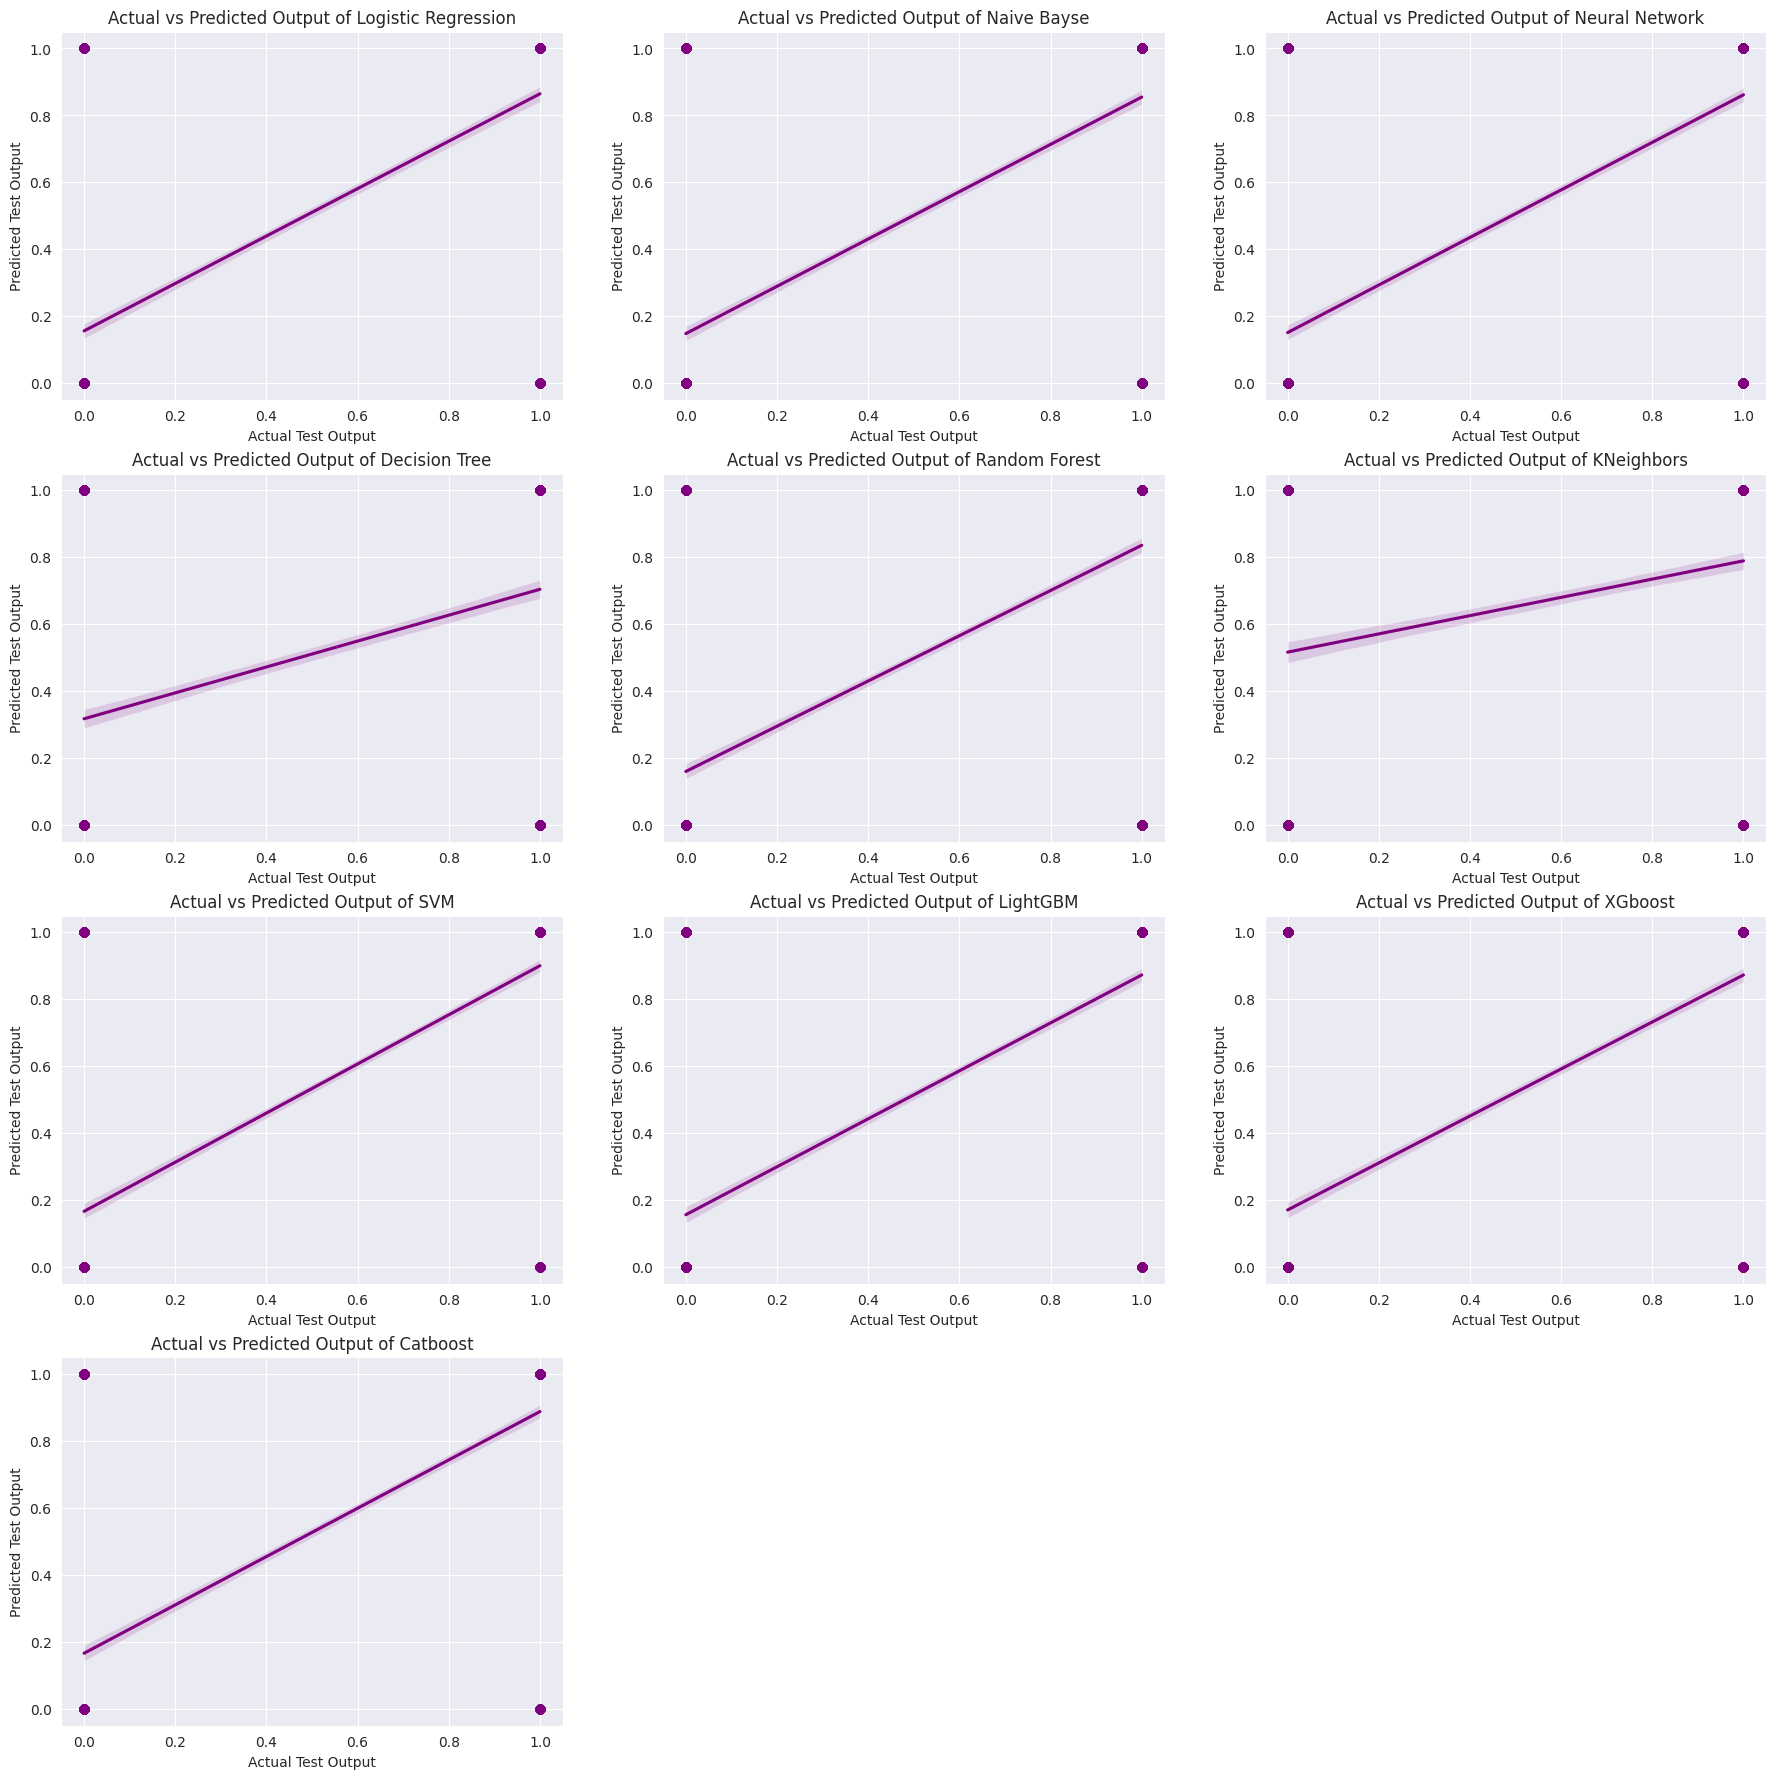

In [113]:
predictions = [y_pred_log, y_pred_nb, y_pred_nn, y_pred_dt, y_pred_rf, y_pred_kn, y_pred_svm, y_pred_lgbm, y_pred_xgb, y_pred_cat]
classifiers_name = ['Logistic Regression', 'Naive Bayse', 'Neural Network', 'Decision Tree', 'Random Forest',
               'KNeighbors', 'SVM', 'LightGBM', 'XGboost', 'Catboost']

plt.figure(figsize= (22,22))
for i, pred in enumerate(predictions):
  plt.subplot(4,3,i+1)
  sns.regplot(x= y_test, y= pred, color= 'purple')
  plt.title(f'Actual vs Predicted Output of {classifiers_name[i]}')
  plt.xlabel('Actual Test Output')
  plt.ylabel('Predicted Test Output')

.

**Result**

Didn't get good accuracy and performance, reasons can be:

* Less amount of data taken for model training
* We trained our model from scretch instead of using pretrained model.